<a href="https://colab.research.google.com/github/NaghmeM/Machin-Learning/blob/main/fuelconsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Packages**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

#**Reading Data**

In [ ]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#**Data Exporation**

In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


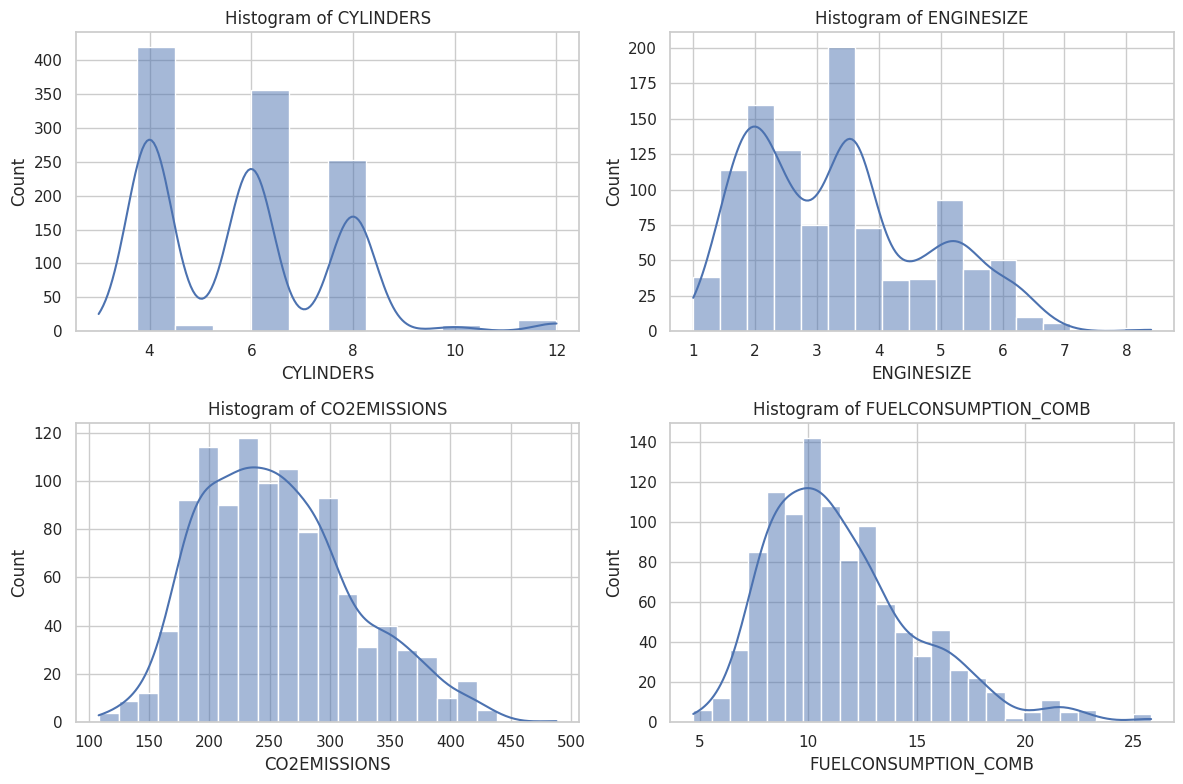

In [ ]:
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for i, column in enumerate(viz.columns):
    sns.histplot(data=viz, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
plt.tight_layout()
plt.show()


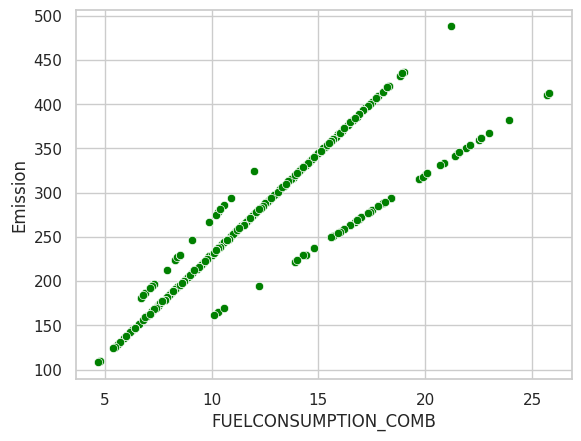

In [ ]:
sns.scatterplot(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', data=cdf, color='green')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

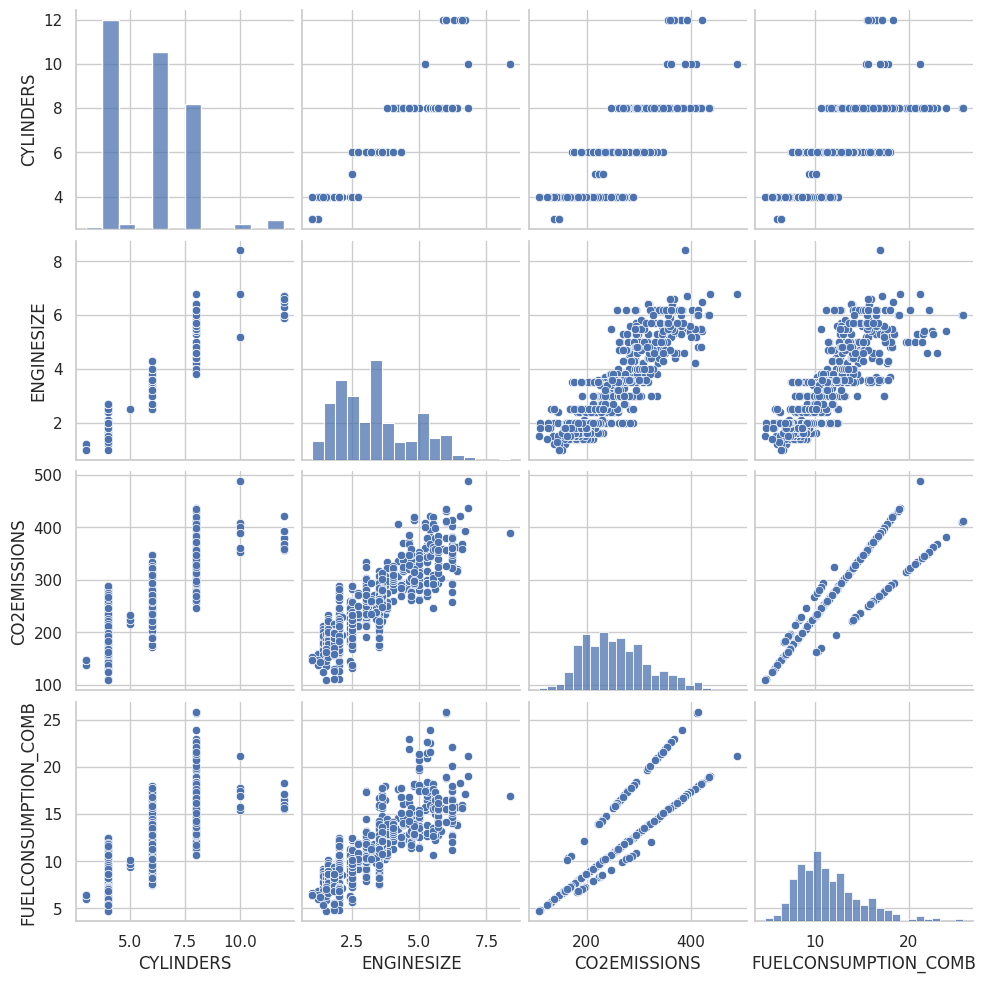

In [ ]:
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]

# Set the style
sns.set(style="whitegrid")

# Create pairplot
sns.pairplot(viz, height=2.5)
plt.show()

#**Creat Train-Test Dataset**

In [ ]:
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

#**Simple Regression Model**

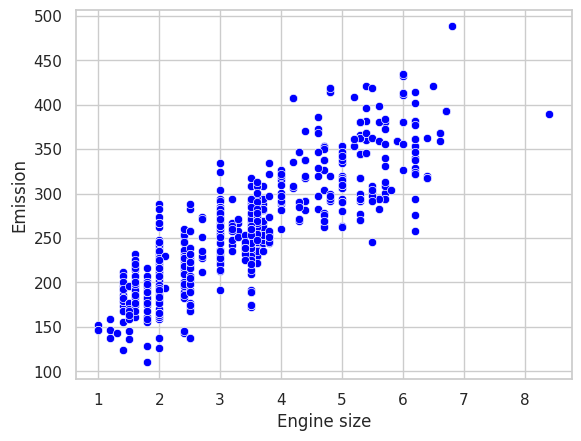

In [ ]:
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=train, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#**Modeling**

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
X_train = np.asanyarray(train[['ENGINESIZE']])
Y_train = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(X_train, Y_train)

print ('Coefficients:', regr.coef_)
print('Intercept', regr.intercept_)

Coefficients: [[39.04364659]]
Intercept [125.25271228]


Text(0, 0.5, 'Emission')

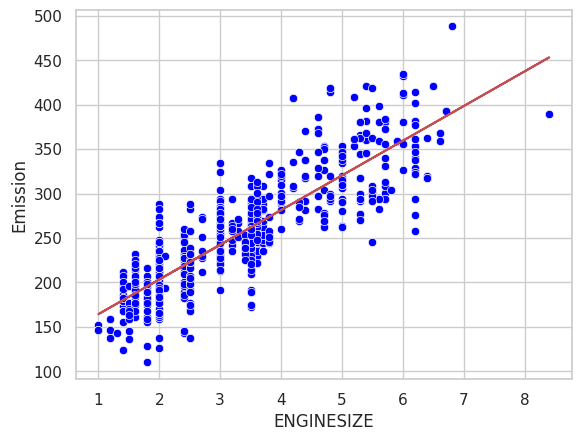

In [ ]:
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=train, color='blue')
plt.plot(X_train , regr.coef_[0][0]*X_train + regr.intercept_[0], '-r')
plt.ylabel("Emission")

In [ ]:
from sklearn.metrics import r2_score

X_test = np.asanyarray(test[['ENGINESIZE']])
Y_test = np.asanyarray(test[['CO2EMISSIONS']])
Y_hat = regr.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_hat - Y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Y_hat - Y_test) ** 2))
print("R2-score: %.2f" % r2_score(Y_test , Y_hat) )

Mean absolute error: 21.63
Residual sum of squares (MSE): 835.29
R2-score: 0.80


#**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
X_train = np.asanyarray(train[['ENGINESIZE']])
Y_train = np.asanyarray(train[['CO2EMISSIONS']])

X_test = np.asanyarray(test[['ENGINESIZE']])
Y_test = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_train_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [ ]:
clf = linear_model.LinearRegression()
Y_train_ = clf.fit(X_train_poly, Y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         47.40426788 -1.12050112]]
Intercept:  [112.04028054]


Text(0, 0.5, 'Emission')

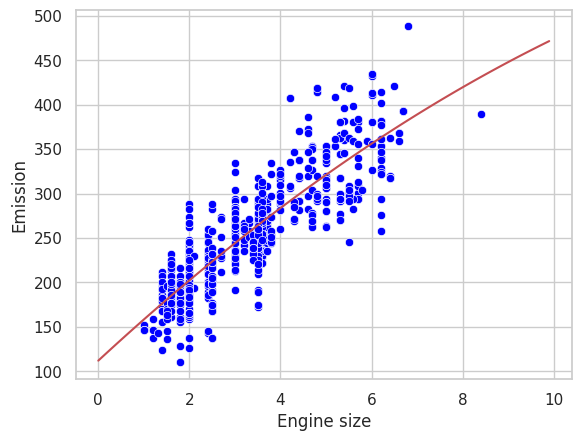

In [ ]:
sns.scatterplot( x='ENGINESIZE', y='CO2EMISSIONS', data=train, color='blue')
XX = np.arange(0.0 , 10.0 , 0.1)
YY= clf.intercept_[0]+clf.coef_[0][1]*XX +clf.coef_[0][2]*np.power(XX,2)
plt.plot(XX, YY, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
X_test_poly = poly.fit_transform(X_test)
Y_hat = clf.predict(X_test_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_hat - Y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Y_hat - Y_test) ** 2))
print("R2-score: %.2f" % r2_score(Y_test,Y_hat ) )


Mean absolute error: 21.36
Residual sum of squares (MSE): 809.99
R2-score: 0.80


In [ ]:

X_train = np.asanyarray(train[['ENGINESIZE']])
Y_train = np.asanyarray(train[['CO2EMISSIONS']])

X_test = np.asanyarray(test[['ENGINESIZE']])
Y_test = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_train_poly

array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [ ]:
clf = linear_model.LinearRegression()
Y_train_ = clf.fit(X_train_poly, Y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         24.72618381  5.23340613 -0.53711137]]
Intercept:  [135.8229583]


Text(0, 0.5, 'Emission')

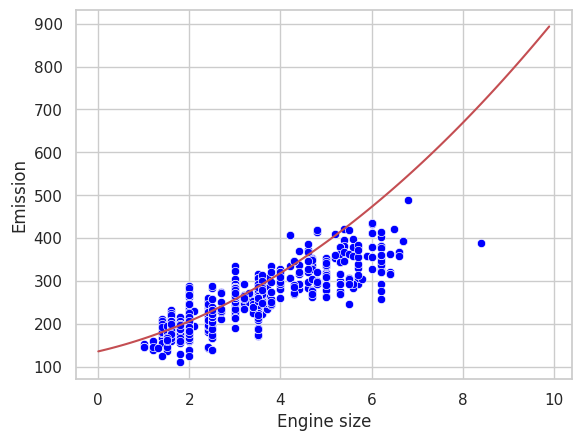

In [ ]:
sns.scatterplot( x='ENGINESIZE', y='CO2EMISSIONS', data=train, color='blue')
XX = np.arange(0.0 , 10.0 , 0.1)
YY= clf.intercept_[0]+clf.coef_[0][1]*XX +clf.coef_[0][2]*np.power(XX,2)
plt.plot(XX, YY, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
X_test_poly = poly.fit_transform(X_test)
Y_hat = clf.predict(X_test_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_hat - Y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Y_hat - Y_test) ** 2))
print("R2-score: %.2f" % r2_score(Y_test,Y_hat ) )


Mean absolute error: 21.28
Residual sum of squares (MSE): 805.38
R2-score: 0.80
